**This notebook is used to analyze the evaluation scores of baseline model.**

In [1]:
import json
import matplotlib.pyplot as plt
import pandas as pd

## 1. load evaluation results

In [2]:
# load valid set
ref_path = '../data/processed/json/'
with open(ref_path + 'valid.json', 'r') as jsonFile:
    data = json.load(jsonFile)

In [3]:
# retrive reference captions 
img_id_dict = {'image_id': list(data.keys())}

imgIds = img_id_dict['image_id']
ref_caption = {}

for imgId in imgIds:
    caption_list = data[imgId]['sentences']
    caption_list_sel = []
    for i in caption_list:
        lst = [value for key,value in i.items() if key == 'raw'][0]
        caption_list_sel.append(lst)
    ref_caption[imgId] = caption_list_sel

In [4]:
# load model results and scores
result_path = '../models/'
with open(result_path + 'baseline_img_score.json', 'r') as jsonFile:
    img_scores = json.load(jsonFile)
    
with open(result_path + 'baseline_score.json', 'r') as f:
    model_scores = json.load(f)
    
with open(result_path + 'test_results.json', 'r') as f1:
    test_results = json.load(f1)

In [5]:
model_scores

{'Bleu_1': 0.6284612525552579,
 'Bleu_2': 0.5018337339939812,
 'Bleu_3': 0.42079461175367683,
 'Bleu_4': 0.3625435060751497,
 'METEOR': 0.28975868597774934,
 'ROUGE_L': 0.535356646079018,
 'CIDEr': 2.050210575685976,
 'SPICE': 0.37917554920476026,
 'USC_similarity': 0.5983279861550914}

## 2. Sample results

In [11]:
img_list = list(test_results.keys())

In [12]:
def img_result(n):
    """
    prints the model results and scores for image with index n
    
    Parameters:
    -----------
    n: int
        the index of image
    
    Return:
    -----------
    a pandas dataframes with evaluation scores
    """
    img = img_list[n]
    print("Image Name:", img)
    img_path = "../../valid/" + img
    pic = plt.imread(img_path)
    plt.imshow(pic)
    plt.show()

    print("-----------------------------")
    print("Human annotated captions: ")
    print("\n".join(ref_caption[img]))
    print("-----------------------------")
    print("Model generated caption:")
    print(test_results[img])
    print("-----------------------------")

    print("Evaluation scores:")
    df = pd.DataFrame(img_scores[img], index = [img])
    return df

Image Name: rsicd_park_3.jpg


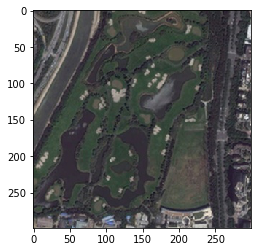

-----------------------------
Human annotated captions: 
the lake is surrounded by many thick trees .
the resident areas besides the dark green trees .
a park with many green trees and several ponds is between a river and some buildings .
a park with many green trees and several ponds is between a river and some buildings .
the lake is surrounded by many thick trees .
-----------------------------
Model generated caption:
many green trees and some buildings are in a park .
-----------------------------
Evaluation scores:


,Bleu_1,Bleu_2,Bleu_3,Bleu_4,METEOR,ROUGE_L,CIDEr,SPICE,USC_similarity
rsicd_park_3.jpg,0.8,0.730297,0.584804,0.411134,0.286011,0.443099,0.679908,0.4,0.575356


In [13]:
img_result(0)

Image Name: ucm_630.jpg


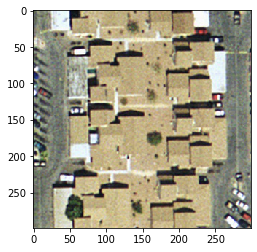

-----------------------------
Human annotated captions: 
This is a dense residential area .
It is a dense residential area with lots of houses with brown roofs arranged neatly .
There are lots of houses with brown roofs arranged neatly .
Lots of houses between two roads arranged neatly .
Lots of houses arranged neatly and some cars parked in the roadside .
-----------------------------
Model generated caption:
Lots of houses arranged neatly and some roads go through them .
-----------------------------
Evaluation scores:
               Bleu_1    Bleu_2    Bleu_3    Bleu_4    METEOR   ROUGE_L  \
ucm_630.jpg  0.727273  0.660578  0.623532  0.590047  0.363074  0.629608   

                CIDEr  SPICE  USC_similarity  
ucm_630.jpg  1.970523    0.4        0.580655  
Image Name: rsicd_bridge_74.jpg


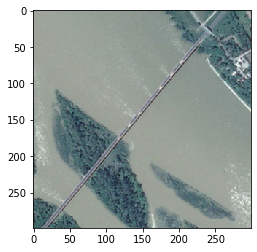

-----------------------------
Human annotated captions: 
under the bridge is a very long river .
there are many trees beside the river .
have a long bridge, across the bright green above the river .
connected on both sides, make cars can through the river .
bridge is on a river with many green trees in two sides .
-----------------------------
Model generated caption:
a piece of green ocean is near yellow beach and many green trees .
-----------------------------
Evaluation scores:
                       Bleu_1    Bleu_2    Bleu_3    Bleu_4    METEOR  \
rsicd_bridge_74.jpg  0.384615  0.253185  0.179954  0.000028  0.201237   

                      ROUGE_L     CIDEr  SPICE  USC_similarity  
rsicd_bridge_74.jpg  0.322325  0.069874    0.2        0.335326  
Image Name: ucm_37.jpg


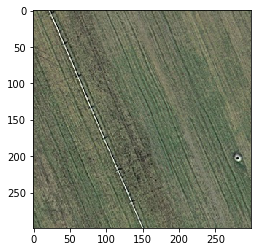

-----------------------------
Human annotated captions: 
There is a piece of farmland .
There is a piece of cropland .
It is a piece of farmland .
It is a piece of cropland .
Here is a piece of farmland .
-----------------------------
Model generated caption:
it is a piece of green meadow .
-----------------------------
Evaluation scores:
              Bleu_1    Bleu_2    Bleu_3    Bleu_4    METEOR   ROUGE_L  \
ucm_37.jpg  0.714286  0.690066  0.658634  0.614788  0.378557  0.780051   

               CIDEr     SPICE  USC_similarity  
ucm_37.jpg  3.023121  0.222222         0.58475  
Image Name: rsicd_00460.jpg


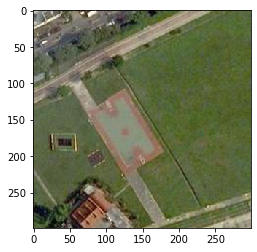

-----------------------------
Human annotated captions: 
we can see a basketball court and a distinctive building in a large tract of grass on the roadside .
a basketball field on meadow is near to a road .
a basketball field is surrounded by green meadows .
a basketball field is surrounded by a large piece of meadow next to a road .
a basketball field is surrounded by green meadows .
-----------------------------
Model generated caption:
a playground is surrounded by many green trees and buildings .
-----------------------------
Evaluation scores:
                 Bleu_1    Bleu_2    Bleu_3    Bleu_4    METEOR   ROUGE_L  \
rsicd_00460.jpg     0.6  0.365148  0.255436  0.000039  0.277357  0.566914   

                    CIDEr     SPICE  USC_similarity  
rsicd_00460.jpg  0.539191  0.068966        0.493227  
Image Name: rsicd_river_228.jpg


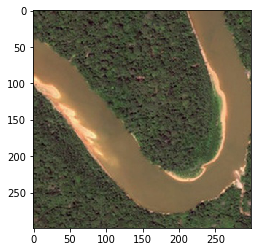

-----------------------------
Human annotated captions: 
the khaki saddle shaped river is across the dense forest .
the river in the rainforest takes on u shaped look .
the khaki saddle shaped river is across the dense forest .
it is a u shaped brown river traverses this forest .
many green trees are in two sides of a curved yellow river .
-----------------------------
Model generated caption:
many green trees are in two sides of a curved gray black river .
-----------------------------
Evaluation scores:
                       Bleu_1    Bleu_2    Bleu_3    Bleu_4    METEOR  \
rsicd_river_228.jpg  0.846154  0.796628  0.772804  0.753922  0.498559   

                      ROUGE_L    CIDEr     SPICE  USC_similarity  
rsicd_river_228.jpg  0.886394  0.90563  0.486486         0.55735  
Image Name: ucm_33.jpg


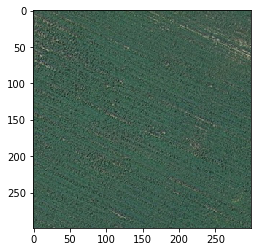

-----------------------------
Human annotated captions: 
There is a piece of farmland .
There is a piece of cropland .
It is a piece of farmland .
It is a piece of cropland .
Here is a piece of farmland .
-----------------------------
Model generated caption:
many green trees are in a piece of forest .
-----------------------------
Evaluation scores:
              Bleu_1    Bleu_2    Bleu_3    Bleu_4   METEOR   ROUGE_L  \
ucm_33.jpg  0.333333  0.288675  0.228336  0.000038  0.22835  0.414966   

               CIDEr     SPICE  USC_similarity  
ucm_33.jpg  1.190643  0.166667        0.251011  
Image Name: rsicd_beach_48.jpg


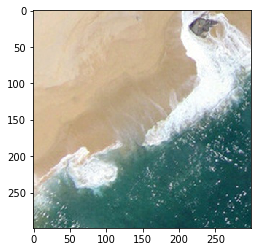

-----------------------------
Human annotated captions: 
the shining sea rush to sand leaving spray around a rock on the coast.
the shining sea rush to sand leaving spray around a rock on the coast.
a rock on the beach next to the sea .
several stones are on the beach .
white waves are between green ocean and yellow beach .
-----------------------------
Model generated caption:
white waves are between yellow beach and blue ocean .
-----------------------------
Evaluation scores:
                      Bleu_1    Bleu_2    Bleu_3    Bleu_4    METEOR  \
rsicd_beach_48.jpg  0.888889  0.666667  0.502632  0.381417  0.415365   

                     ROUGE_L     CIDEr     SPICE  USC_similarity  
rsicd_beach_48.jpg  0.666667  0.978891  0.434783        0.498815  
Image Name: rsicd_farmland_203.jpg


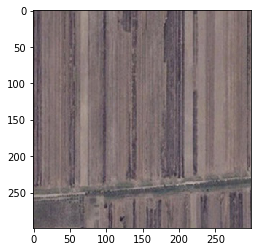

-----------------------------
Human annotated captions: 
the dense farm land is divided by a row of trees .
a road go through the farmland who has a striped pattern with different shade of color
the dense farm land is divided by a row of trees
stripes of brown and black crops is cut by a straight road .
a small wild road is in a piece of farmland .
-----------------------------
Model generated caption:
many pieces of farmlands are together .
-----------------------------
Evaluation scores:
                         Bleu_1        Bleu_2        Bleu_3        Bleu_4  \
rsicd_farmland_203.jpg  0.08557  2.964215e-09  1.040902e-11  6.628187e-13   

                          METEOR   ROUGE_L     CIDEr     SPICE  USC_similarity  
rsicd_farmland_203.jpg  0.124839  0.119608  0.013362  0.176471        0.465468  
Image Name: ucm_853.jpg


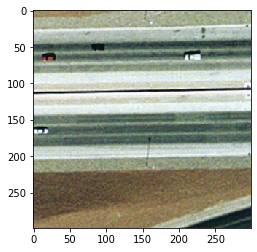

-----------------------------
Human annotated captions: 
There are two straight freeways closed together .
There are two straight freeways with some cars on the roads .
Two straight freeways with some cars on them .
Two straight freeways closed to each other .
Two straight freeways closed to each other with some cars on them .
-----------------------------
Model generated caption:
There are two straight freeways closed to each other and some plants beside the roads .
-----------------------------
Evaluation scores:
             Bleu_1    Bleu_2    Bleu_3    Bleu_4    METEOR   ROUGE_L  \
ucm_853.jpg     0.8  0.717137  0.651808  0.610003  0.520556  0.736048   

                CIDEr     SPICE  USC_similarity  
ucm_853.jpg  2.662121  0.470588        0.814414  
Image Name: rsicd_port_293.jpg


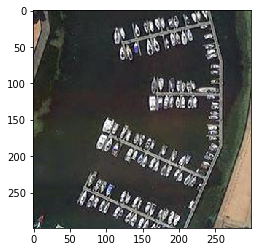

-----------------------------
Human annotated captions: 
many boats are orderly in a port near several green trees .
many boats are orderly in a port near several green trees .
many boats are orderly in a port near several green trees .
many boats are orderly in a port near several green trees .
many boats are orderly in a port near several green trees .
-----------------------------
Model generated caption:
many boats are orderly in a port near several green trees .
-----------------------------
Evaluation scores:
                    Bleu_1  Bleu_2  Bleu_3  Bleu_4  METEOR  ROUGE_L  CIDEr  \
rsicd_port_293.jpg     1.0     1.0     1.0     1.0     1.0      1.0   10.0   

                    SPICE  USC_similarity  
rsicd_port_293.jpg    1.0             1.0  


In [14]:
# sample 10 images
for i in range(55, 65):
    results = img_result(i)
    print(results)

In [26]:
df

NameError: name 'df' is not defined

Image Name: rsicd_playground_97.jpg


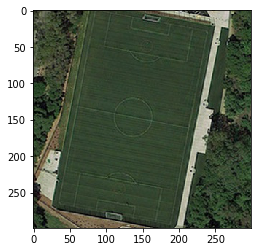

-----------------------------
Human annotated captions: 
there's a green field on the playground .
shrubs around the football field .
many green trees are in two sides of a football field .
many green trees are in two sides of a football field .
there's a green field on the playground .
-----------------------------
Model generated caption:
a football field is near several green trees and a building .
-----------------------------
Evaluation scores:


In [32]:
df = img_result(12)

In [33]:
df

,Bleu_1,Bleu_2,Bleu_3,Bleu_4,METEOR,ROUGE_L,CIDEr,SPICE,USC_similarity
rsicd_playground_97.jpg,0.454545,0.369274,0.247449,0.000037,0.279231,0.33578,1.354815,0.380952,0.716593


In [44]:
### overall score

In [45]:
# score for image
df.iloc[0]

Bleu_1            0.454545
Bleu_2            0.369274
Bleu_3            0.247449
Bleu_4            0.000037
METEOR            0.279231
ROUGE_L           0.335780
CIDEr             1.354815
SPICE             0.380952
USC_similarity    0.716593
Name: rsicd_playground_97.jpg, dtype: float64

In [47]:
# weight for each metrics
weights = [1/9, 
          1/9,
          1/9,
          1/9,
          1/9,
          1/9,
          1/90,
          1/9,
          1/9]

In [48]:
overall_score = df.iloc[0] @ weights
overall_score

0.32437155878601776